In [160]:
import wfdb
from scipy import signal
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
import pandas as pd
import csv
from hrvanalysis import get_time_domain_features
import seaborn as sns
import pickle
from scipy.signal import welch
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
from scipy.signal import argrelextrema

In [319]:
# 加载保存的 HF_AX 列表
with open('HF_AX_1.pkl', 'rb') as file:
    HF_AX = pickle.load(file)

In [311]:
# 时域特征：
# Mean Absolute Value (MAV)：计算信号的绝对值的平均值。
# Root Mean Square (RMS)：计算信号的平方的均值的平方根。
# Variance (VAR)：计算信号的方差，用于衡量信号的能量。
# Waveform Length (WL)：计算信号的累积长度。
# Zero Crossings (ZC)：计算信号穿过零点的次数。
# Slope Sign Changes (SSC)：计算信号的斜率变化的次数。
# Willison Amplitude (WAMP)：计算相邻样本之间差异超过阈值的次数。
# Simple Square Integral (SSI)：计算信号的能量。
# Standard Deviation (SD)：计算信号的标准差。
# Absolute Value Of The Summation Of Expth (ASM)：计算信号的绝对值的和。
# Absolute Value Of The Summation Of Square Root (ASS)：计算信号的平方根的和。
# Cardinality (CARD)：计算信号的不同值的数量。
# Coefficient Of Variation (COV)：计算信号的标准差与均值的比率。
# Difference Absolute Mean Value (DAMV)：计算信号均值的绝对差异。
# Difference Absolute Standard Deviation Value (DASDV)：计算信号的波长的标准差值。

# 频域特征：
# Frequency Median (FMD)：计算频谱的中位数。
# Frequency Mean (FMN)：计算频谱的平均值。
# Modified Frequency Median (MFMD)：计算修改后的频谱中位数。
# Frequency Ratio (FR)：计算不同频率内容之间的差异。

# 非线性特征：
# Sample Entropy (SampEn)：计算样本熵，用于评估时间序列的规则性。
# Approximate Entropy (ApEn)：计算近似熵，用于估计时间序列的规则性。
# Distance Entropy (DistEn)：计算距离熵，用于完整量化状态空间中矢量之间的距离信息。
# Fuzzy Entropy (FuzzyEn)：计算模糊熵，引入模糊集的概念。
# Fuzzy Measure Entropy (FuzzyMEn)：计算模糊测度熵，考虑局部和全局特征。
# Permutation entropy (PermEn)：计算排列熵，用于测量混沌时间序列的复杂性。

## 经典时域特征提取

### 特征函数

In [157]:
# 1. Mean Absolute Value (MAV)
def mean_absolute_value(signal):
    mav = np.mean(np.abs(signal))
    return mav

# 2. Root Mean Square (RMS)
def root_mean_square(signal):
    rms = np.sqrt(np.mean(signal**2))
    return rms

# 3. Variance (VAR)
def variance(signal):
    var = np.var(signal)
    return var

# 4. Waveform Length (WL)
def waveform_length(signal):
    wl = np.sum(np.abs(np.diff(signal)))
    return wl

# 5. Zero Crossings (ZC)
def zero_crossings(signal):
    zc = np.sum(np.diff(np.sign(signal)) != 0)
    return zc

# 6. Slope Sign Changes (SSC)
def slope_sign_changes(signal):
    diff_sign = np.diff(np.sign(np.diff(signal)))
    ssc = np.sum(diff_sign != 0)
    return ssc

# 7. Willison Amplitude (WAMP)
def willison_amplitude(signal, threshold):
    if threshold == None:
        threshold = 0.1 * np.std(qrs)
    # 初始化计数器
    wamp_count = 0
    # 计算振幅变化次数
    for i in range(1, len(signal)):
        if abs(signal[i] - signal[i-1]) >= threshold:
            wamp_count += 1          
    return wamp_count


# 8. Simple Square Integral (SSI)
def simple_square_integral(signal):
    ssi = np.sum(signal**2)
    return ssi

# 9. Standard Deviation (SD)
def standard_deviation(signal):
    sd = np.std(signal)
    return sd

# 10. Absolute Value Of The Summation Of Expth (ASM)
def absolute_sum_exp(signal):
    asm = np.sum(np.abs(signal))
    return asm

# 11. Absolute Value Of The Summation Of Square Root (ASS)
def absolute_sum_sqrt(signal):
    ass = np.sum(np.sqrt(np.abs(signal)))
    return ass

# 12. Cardinality (CARD)
def cardinality(signal):
    card = len(np.unique(signal))
    return card

# 13. Coefficient Of Variation (COV)
def coefficient_of_variation(signal):
    cov = np.std(signal) / np.mean(signal)
    return cov

# 14. Difference Absolute Mean Value (DAMV)
def difference_absolute_mean_value(signal):
    damv = np.mean(np.abs(np.diff(signal)))
    return damv

# 15. Difference Absolute Standard Deviation Value (DASDV)
def difference_absolute_standard_deviation(signal):
    dasdv = np.std(np.diff(signal))
    return dasdv

# 16. Difference Variance Value (DVARV)
def difference_variance_value(signal):
    diff_signal = np.diff(signal)
    dvarv = np.var(diff_signal)
    return dvarv

# 17. Interquartile Range (IQR)
def interquartile_range(signal):
    q75, q25 = np.percentile(signal, [75 ,25])
    iqr = q75 - q25
    return iqr

# 18. Kurtosis (KURT)
def calculate_kurtosis(signal):
    return kurtosis(signal)

# 19. Log Teager Kaiser Energy Operator (LTKEO)
def log_teager_kaiser_energy_operator(signal):
    ltkeo = np.sum(np.square(signal[1:-1] - 0.5 * (signal[:-2] + signal[2:])))
    return np.log(ltkeo)

# 20. Mean Absolute Deviation (MAD)
def mean_absolute_deviation(signal):
    return np.mean(np.abs(signal - np.mean(signal)))

# 21. Skewness (SKEW)
def calculate_skewness(signal):
    return skew(signal)

# 22. amax
def calculate_amax(signal):
    return np.max(signal)

In [132]:

# 2. 频谱峰值频率 (Peak Frequency)
def peak_frequency(signal, sampling_rate):
    f, psd = welch(signal, fs=sampling_rate)
    peak_freq = f[np.argmax(psd)]
    return peak_freq

# 3. 频谱带宽 (Bandwidth)
def bandwidth(signal, sampling_rate):
    f, psd = welch(signal, fs=sampling_rate)
    half_max_psd = max(psd) / 2
    mask = psd > half_max_psd
    bw = f[mask][-1] - f[mask][0]
    return bw

# 4. 频谱能量 (Spectral Energy)
def spectral_energy(signal, sampling_rate):
    _, psd = welch(signal, fs=sampling_rate)
    energy = np.trapz(psd, dx=(1/sampling_rate))
    return energy

In [147]:
def sample_entropy(signal, m, r):
    """
    计算样本熵（Sample Entropy）
    
    Parameters:
    signal (ndarray): 输入信号
    m (int): 子序列长度
    r (float): 相似性阈值
    
    Returns:
    float: 样本熵值
    """
    if r == None:
        r = np.std(signal)
    N = len(signal)
    m = int(m)
    r = np.std(signal) * r
    
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    
    def _phi(m):
        x = [[signal[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) for x_i in x]
        return np.sum(C) / (N - m + 1)
    
    return -np.log(_phi(m+1) / _phi(m))

def approximate_entropy(signal, m, r):
    """
    计算近似熵（Approximate Entropy）
    
    Parameters:
    signal (ndarray): 输入信号
    m (int): 子序列长度
    r (float): 相似性阈值
    
    Returns:
    float: 近似熵值
    """
    if r == None:
        r = np.std(signal)
    N = len(signal)
    m = int(m)
    r = np.std(signal) * r
    
    def _phi(m):
        x = [[signal[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        return np.mean([np.sum(np.abs(np.subtract(x_i, x_j)) <= r) - 1 for x_i in x for x_j in x])
    
    return -np.log(_phi(m+1) / _phi(m))

def permutation_entropy(signal, m):
    """
    计算排列熵（Permutation Entropy）
    
    Parameters:
    signal (ndarray): 输入信号
    m (int): 子序列长度
    
    Returns:
    float: 排列熵值
    """
    N = len(signal)
    permutations = np.array(list(itertools.permutations(range(m))))
    num_permutations = len(permutations)
    
    x = np.array([signal[i:i+m] for i in range(N-m+1)])
    frequencies = np.zeros(num_permutations)
    
    for i, perm in enumerate(permutations):
        for j, subseq in enumerate(x):
            if np.all(np.argsort(subseq) == perm):
                frequencies[i] += 1
    
    probabilities = frequencies / (N - m + 1)
    
    return -np.sum(probabilities * np.log(probabilities))

def fuzzy_entropy(signal, m, r):
    """
    计算模糊熵（Fuzzy Entropy）
    
    Parameters:
    signal (ndarray): 输入信号
    m (int): 子序列长度
    r (float): 相似性阈值
    
    Returns:
    float: 模糊熵值
    """
    if r == None:
        r = np.std(signal)
    N = len(signal)
    m = int(m)
    r = np.std(signal) * r
    
    def _phi(m):
        x = [[signal[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        return np.mean([np.sum(np.exp(-((_maxdist(x_i, x_j) / r) ** 2))) for x_i in x for x_j in x])
    
    return -np.log(_phi(m+1) / _phi(m))

### 1. Mean Absolute Value (MAV)

In [320]:
mav_val = []
for ecg in HF_AX:
    mav_list = []
    for qrs in ecg[0]:    
        mav = mean_absolute_value(qrs)  # 修正此处传递的参数
        mav_list.append(mav)  # 修正此处添加的对象
    mav_val.append(np.mean(mav_list))

In [321]:
len(mav_val)

448

In [322]:
mav_val

[0.0007488462456770814,
 0.0009705236083123974,
 0.0012496752147412777,
 0.0007555638791390702,
 0.0006838644010890035,
 0.0012794000266370242,
 0.001641971475010678,
 0.0009879285205001915,
 0.0009993138706238561,
 0.0009098299243915711,
 0.0014589449830632356,
 0.0008476489049213127,
 0.0009456734215536235,
 0.0017285857348217821,
 0.0011099574742423294,
 0.0009244757610406129,
 0.0014111040711141157,
 0.0012232299058974887,
 0.0007117039990688128,
 0.0014656136784411194,
 0.001188382715204881,
 0.0009115383479929432,
 0.0009355115946421587,
 0.0012511700355575142,
 0.0008095969611237562,
 0.0009987030348453476,
 0.0015798629818713748,
 0.00363819599586812,
 0.0009093454050495582,
 0.001296152776218109,
 0.002693954050880855,
 0.001255410365048917,
 0.0011001133805992845,
 0.0007036840774784789,
 0.0014506358053337914,
 0.0007666832774911227,
 0.0011726377689843547,
 0.0010789764088650817,
 0.0009255547823579059,
 0.000822842729534331,
 0.0011250310260401647,
 0.001065456530507047,
 

### 2. Root Mean Square (RMS)

In [323]:
rms_val = []
for ecg in HF_AX:
    rms_list = []
    for qrs in ecg[0]:    
        rms = root_mean_square(qrs)  # 修正此处传递的参数
        rms_list.append(rms)  # 修正此处添加的对象
    rms_val.append(np.mean(rms_list))

In [324]:
len(rms_val)

448

### 3. Variance (VAR)

In [325]:
var_val = []
for ecg in HF_AX:
    var_list = []
    for qrs in ecg[0]:    
        var = variance(qrs)  # 修正此处传递的参数
        var_list.append(var)  # 修正此处添加的对象
    var_val.append(np.mean(var_list))

In [326]:
len(var_val)

448

### 4. Waveform Length (WL)

In [327]:
wl_val = []
for ecg in HF_AX:
    wl_list = []
    for qrs in ecg[0]:    
        wl = waveform_length(qrs)  # 修正此处传递的参数
        wl_list.append(wl)  # 修正此处添加的对象
    wl_val.append(np.mean(wl_list))

In [328]:
len(wl_val)

448

### 5. Zero Crossings (ZC)

In [329]:
zc_val = []
for ecg in HF_AX:
    zc_list = []
    for qrs in ecg[0]:    
        zc = zero_crossings(qrs)  # 修正此处传递的参数
        zc_list.append(zc)  # 修正此处添加的对象
    zc_val.append(np.mean(zc_list))

In [330]:
len(zc_val)

448

### 6. Slope Sign Changes (SSC)

In [333]:
ssc_val = []
for ecg in HF_AX:
    ssc_list = []
    for qrs in ecg[0]:    
        ssc =  slope_sign_changes(qrs)  # 修正此处传递的参数
        ssc_list.append(ssc)  # 修正此处添加的对象
    ssc_val.append(np.mean(ssc_list))

In [334]:
len(ssc_val)

448

### 7. Willison Amplitude (WAMP)

In [336]:
wamp_val = []
for ecg in HF_AX:
    wamp_list = []
    for qrs in ecg[0]:    
        wamp = willison_amplitude(qrs, threshold = None)  # 修正此处传递的参数
        wamp_list.append(wamp)  # 修正此处添加的对象
    wamp_val.append(np.mean(wamp_list))

In [337]:
len(wamp_val)

448

### 8. Simple Square Integral (SSI)

In [338]:
ssi_val = []
for ecg in HF_AX:
    ssi_list = []
    for qrs in ecg[0]:    
        ssi = simple_square_integral(qrs)  # 修正此处传递的参数
        ssi_list.append(ssi)  # 修正此处添加的对象
    ssi_val.append(np.mean(ssi_list))

In [339]:
len(ssi_val)

448

### 9. Standard Deviation (SD)

In [340]:
sd_val = []
for ecg in HF_AX:
    sd_list = []
    for qrs in ecg[0]:    
        sd = standard_deviation(qrs)  # 修正此处传递的参数
        sd_list.append(sd)  # 修正此处添加的对象
    sd_val.append(np.mean(sd_list))

In [341]:
len(sd_val)

448

### 10. Absolute Value Of The Summation Of Expth (ASM)

In [342]:
asm_val = []
for ecg in HF_AX:
    asm_list = []
    for qrs in ecg[0]:    
        asm = absolute_sum_exp(qrs)  # 修正此处传递的参数
        asm_list.append(asm)  # 修正此处添加的对象
    asm_val.append(np.mean(asm_list))

In [343]:
len(asm_val)

448

### 11. Absolute Value Of The Summation Of Square Root (ASS)

In [344]:
ass_val = []
for ecg in HF_AX:
    ass_list = []
    for qrs in ecg[0]:    
        ass = absolute_sum_sqrt(qrs)  # 修正此处传递的参数
        ass_list.append(ass)  # 修正此处添加的对象
    ass_val.append(np.mean(ass_list))

In [345]:
len(ass_val)

448

### 12. Cardinality (CARD)

In [346]:
card_val = []
for ecg in HF_AX:
    card_list = []
    for qrs in ecg[0]:    
        card = cardinality(qrs)  # 修正此处传递的参数
        card_list.append(card)  # 修正此处添加的对象
    card_val.append(np.mean(card_list))

In [347]:
len(card_val)

448

### 13. Coefficient Of Variation (COV)

In [348]:
cov_val = []
for ecg in HF_AX:
    cov_list = []
    for qrs in ecg[0]:    
        cov = coefficient_of_variation(qrs)  # 修正此处传递的参数
        cov_list.append(cov)  # 修正此处添加的对象
    cov_val.append(np.mean(cov_list))

In [349]:
len(cov_val)

448

### 14. Difference Absolute Mean Value (DAMV)

In [350]:
damv_val = []
for ecg in HF_AX:
    damv_list = []
    for qrs in ecg[0]:    
        damv = difference_absolute_mean_value(qrs)  # 修正此处传递的参数
        damv_list.append(damv)  # 修正此处添加的对象
    damv_val.append(np.mean(damv_list))

In [351]:
len(damv_val)

448

### 15. Difference Absolute Standard Deviation Value (DASDV)

In [352]:
dasdv_val = []
for ecg in HF_AX:
    dasdv_list = []
    for qrs in ecg[0]:    
        dasdv = difference_absolute_standard_deviation(qrs)  # 修正此处传递的参数
        dasdv_list.append(dasdv)  # 修正此处添加的对象
    dasdv_val.append(np.mean(dasdv_list))

In [353]:
len(dasdv_val)

448

### 16. Difference Variance Value (DVARV)

In [354]:
dvarv_val = []
for ecg in HF_AX:
    dvarv_list = []
    for qrs in ecg[0]:    
        dvarv = difference_variance_value(qrs)  # 修正此处传递的参数
        dvarv_list.append(dvarv)  # 修正此处添加的对象
    dvarv_val.append(np.mean(dvarv_list))

In [355]:
len(dvarv_val)

448

### 17. Interquartile Range (IQR)

In [356]:
iqr_val = []
for ecg in HF_AX:
    iqr_list = []
    for qrs in ecg[0]:    
        iqr = interquartile_range(qrs)  # 修正此处传递的参数
        iqr_list.append(iqr)  # 修正此处添加的对象
    iqr_val.append(np.mean(iqr_list))

In [357]:
len(iqr_val)

448

### 18. Kurtosis (KURT)

In [358]:
kurt_val = []
for ecg in HF_AX:
    kurt_list = []
    for qrs in ecg[0]:    
        kurt = calculate_kurtosis(qrs)  # 修正此处传递的参数
        kurt_list.append(kurt)  # 修正此处添加的对象
    kurt_val.append(np.mean(kurt_list))

In [359]:
len(kurt_val)

448

### 19. Log Teager Kaiser Energy Operator (LTKEO)

In [360]:
ltkeo_val = []
for ecg in HF_AX:
    ltkeo_list = []
    for qrs in ecg[0]:    
        ltkeo = log_teager_kaiser_energy_operator(qrs)  # 修正此处传递的参数
        ltkeo_list.append(ltkeo)  # 修正此处添加的对象
    ltkeo_val.append(np.mean(ltkeo_list))

In [361]:
len(ltkeo_val)

448

### 20. Mean Absolute Deviation (MAD)

In [362]:
mad_val = []
for ecg in HF_AX:
    mad_list = []
    for qrs in ecg[0]:    
        mad = mean_absolute_deviation(qrs)  # 修正此处传递的参数
        mad_list.append(mad)  # 修正此处添加的对象
    mad_val.append(np.mean(mad_list))

In [363]:
len(mad_val)

448

### 21. Skewness (SKEW)

In [364]:
skew_val = []
for ecg in HF_AX:
    skew_list = []
    for qrs in ecg[0]:    
        skew1 = calculate_skewness(qrs)  
        skew_list.append(skew1)  
    skew_val.append(np.mean(skew_list))

In [365]:
len(skew_val)

448

### 21. amax

In [366]:
amax_val = []
for ecg in HF_AX:
    amax_list = []
    for qrs in ecg[0]:    
        amax = calculate_amax(qrs)  
        amax_list.append(amax)  
    amax_val.append(np.mean(amax_list))

In [367]:
len(amax_val)

448

## 经典频域特征提取

In [130]:
sampling_rate = 1000

### 频谱峰值频率 (Peak Frequency)

In [368]:
pf_val = []
for ecg in HF_AX:
    pf_list = []
    for qrs in ecg[0]:    
        pf = peak_frequency(qrs, sampling_rate)
        pf_list.append(pf)  
    pf_val.append(np.mean(pf_list))

In [369]:
len(pf_val)

448

### 频谱带宽 (Bandwidth)

In [370]:
band_val = []
for ecg in HF_AX:
    band_list = []
    for qrs in ecg[0]:    
        band = bandwidth(qrs, sampling_rate)
        band_list.append(band)  
    band_val.append(np.mean(band_list))

In [371]:
len(band_val)

448

### 频谱能量 (Spectral Energy)

In [372]:
se_val = []
for ecg in HF_AX:
    se_list = []
    for qrs in ecg[0]:    
        se = spectral_energy(qrs, sampling_rate)
        se_list.append(se)  
    se_val.append(np.mean(se_list))

In [373]:
len(se_val)

448

## 经典非线性特征提取

### 样本熵（Sample Entropy）

In [376]:
sampe_val = []
j = 0
for ecg in HF_AX:
    print(j)
    j += 1
    sampe_list = []
    for qrs in ecg[0]:    
        sampe = sample_entropy(qrs, m=2, r=None)
        sampe_list.append(sampe)  
    sampe_val.append(np.mean(sampe_list))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [377]:
# 将列表转换为 DataFrame
sampe_val_df = pd.DataFrame(sampe_val)

# 将 DataFrame 写入 CSV 文件
sampe_val_df.to_csv('sampe_val_2.csv', index=False)

### 近似熵（Approximate Entropy）

In [303]:
ape_val = []
j = 0
for ecg in HF_AX:
    print(j)
    j += 1
    ape_list = []
    for qrs in ecg[0]:    
        ape = approximate_entropy(qrs, m=2, r=None)
        ape_list.append(ape)  
    ape_val.append(np.mean(ape_list))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\sjq397\AppData\Local\Temp\ipykernel_15228\501974719.py:51: RuntimeWarning: invalid value encountered in log
  return -np.log(_phi(m+1) / _phi(m))


444
445
446
447


In [309]:
# 将列表转换为 DataFrame
ape_val_df = pd.DataFrame( ape_val)

# 将 DataFrame 写入 CSV 文件
ape_val_df.to_csv(' ape_val_2.csv', index=False)

### 排列熵（Permutation Entropy）

In [ ]:
pere_val = []
for ecg in HF_AX:
    pere_list = []
    for qrs in ecg[0]:    
        pere = permutation_entropy(qrs, m=2)
        pere_list.append(pere)  
    pere_val.append(np.mean(pere_list))

### 模糊熵（Fuzzy Entropy）

In [ ]:
fue_val = []
for ecg in HF_AX:
    fue_list = []
    for qrs in ecg[0]:    
        fue = fuzzy_entropy(qrs, m=2, r=None)
        fue_list.append(fue)  
    fue_val.append(np.mean(fue_list))

## PMI and HFMI

In [169]:
def find_p2(signal):
    # 找到信号的极大值的索引
    maxima_indices = argrelextrema(signal, np.greater)[0]
    Amax_index = np.argmax(signal)
    Amax_value = signal[Amax_index]
    # 存储满足条件的特殊极大值
    special_maxima = []

    # 遍历所有极大值
    for i in range(3, len(maxima_indices) - 3):
        current_maxima = signal[maxima_indices[i]]
        previous_maxima_values = signal[maxima_indices[i-3:i]]
        next_maxima_values = signal[maxima_indices[i+1:i+4]]

        # 检查是否满足条件
        if current_maxima > np.max(previous_maxima_values) and current_maxima > np.max(next_maxima_values):
            if maxima_indices[i]>Amax_index:
                special_maxima.append((maxima_indices[i], current_maxima))
    if not special_maxima:
        return 0  # 或者其他适当的返回值
    return special_maxima[0]

def find_RAZ(signal):
    # 找到信号的极大值的索引
    maxima_indices = argrelextrema(signal, np.greater)[0]
    Amax_index = np.argmax(signal)
    Amax_value = signal[Amax_index]

    # 把区间控制在P1，P2之间
    p1p2_part_indexes = []
    p2 = find_p2(signal)
    for i in maxima_indices:
        if i > Amax_index and i < p2[0]:
            p1p2_part_indexes.append(i)    
    v_index = np.argmin(signal[p1p2_part_indexes])
    v_index = p1p2_part_indexes[v_index]
    v_value = signal[v_index]

    return v_index,v_value

def get_pmi(signal):
    p2 = find_p2(signal)
    if p2:
        v = find_RAZ(signal)
        Amax_index = np.argmax(signal)
        Amax_value = signal[Amax_index]
#         print(Amax_value)
#         print(p2[1])
#         print(v[1])
        pmi_value = min(np.abs(Amax_value-v[1]), np.abs(p2[1]-v[1]))/ max(np.abs(Amax_value-v[1]), np.abs(p2[1]-v[1]))

    if not p2:
        pmi_value = 0
    return pmi_value

def get_hfmi(signal):
    p2 = find_p2(signal)
    if not p2:
        return 0

    # 连接极大值点
    maxima_indices = argrelextrema(signal,np.greater)[0]
    maxima_values = signal[maxima_indices]
    # 计算面积
    s_hfqrs = np.trapz(maxima_values, x=maxima_indices)
    Amax_index = np.argmax(signal)
    Amax_value = signal[Amax_index]
    # 连接p1、p2 记l
    line_x = np.array([Amax_index, p2[0]])
    line_y = np.array([Amax_value, p2[1]])
    # 计算直线 l 与 x 轴之间的面积
    line_area = np.trapz(line_y, x=line_x)

    # 连接p1、p2内所有极大值点（含p1、p2）
    p1p2_part_indexes_bi = []
    for i in maxima_indices:
        if((i > Amax_index) or (i == Amax_index))and ((i < p2[0]) or (i == p2[0])):
            p1p2_part_indexes_bi.append(i)
    p1p2_part_indexes_bi
    p1p2_part_value_bi = signal[p1p2_part_indexes_bi]
    # 计算总面积
    total_area = np.trapz(p1p2_part_value_bi, x=p1p2_part_indexes_bi)

    # 计算所求面积
    s_raz = line_area-total_area 
    hfmi = s_raz/s_hfqrs
    return hfmi

### PMI

In [374]:
pmi_val = []
for ecg in HF_AX:
    pmi_list = []
    for qrs in ecg[0]:    
        pmi = get_pmi(qrs)
        pmi_list.append(pmi)  
    pmi_val.append(np.mean(pmi_list))

448

### HFMI

In [375]:
hfmi_val = []
for ecg in HF_AX:
    hfmi_list = []
    for qrs in ecg[0]:    
        hfmi = get_hfmi(qrs)
        hfmi_list.append(hfmi)  
    hfmi_val.append(np.mean(hfmi_list))

In [268]:
features = [mav_val, rms_val, var_val, wl_val, zc_val, ssc_val, wamp_val, ssi_val, 
                sd_val, asm_val, ass_val, card_val, cov_val, 
                damv_val, dasdv_val, dvarv_val, iqr_val, kurt_val, ltkeo_val,
                mad_val, skew_val, amax_val, pf_val, band_val, se_val, pmi_val, hfmi_val]

# 遍历每个特征值并展平
for i in range(len(features)):
    features[i] = np.array(features[i])
    print(features[i].shape)



(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)
(448,)


In [266]:
features[0].shape

(448,)

In [379]:
# 将特征名称中包含逗号的部分分割成单独的特征
feature_names = ["MAV", "RMS", "VAR", "WL", "ZC", "SSC", "WAMP", "SSI",
                "SD", "ASM", "ASS", "CARD", "COV", "DAMV", "DASDV", "DVARV", 
                "IQR", "KURT", "LTKEO", "MAD", "SKEW", "AMAX", "PF", "BAND",
                "SE", "PMI", "HFMI"]

# 创建包含特征值的列表
features_val = [mav_val, rms_val, var_val, wl_val, zc_val, ssc_val, wamp_val, ssi_val, 
                sd_val, asm_val, ass_val, card_val, cov_val, 
                damv_val, dasdv_val, dvarv_val, iqr_val, kurt_val, ltkeo_val,
                mad_val, skew_val, amax_val, pf_val, band_val, se_val, pmi_val, hfmi_val]

# 将特征值列表转换为 numpy 数组并展平
features_array = np.array([np.array(feature).flatten() for feature in features_val])

# 创建 DataFrame
df = pd.DataFrame(features_array.T, columns=feature_names)

In [380]:
df.to_csv('df_3.csv', index=True)

## 模型训练

In [294]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=5)
pca_model.fit(df.drop('label', axis=1))
X_pca = pca_model.fit_transform(df.drop('label', axis=1))
pca_model.explained_variance_ratio_.sum()

0.9999988271425758

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
ros = RandomOverSampler(sampling_strategy='minority') 
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df['label'] = 0
df.loc[80:, 'label'] = 1

# 将 'label' 列移动到数据集的第一列
df = df[['label'] + [col for col in df.columns if col != 'label']]

# 分割特征和标签
# X = df.drop('label', axis=1)
X = X_pca
y = df['label']
X_resampled, y_resampled = ros.fit_resample(X, y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 初始化和训练随机森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 初始化和训练SVM模型
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 初始化和训练XGBoost模型
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测并评估性能
rf_accuracy = rf_model.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)
xgb_accuracy = xgb_model.score(X_test, y_test)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


Random Forest Accuracy: 0.972972972972973
SVM Accuracy: 0.5540540540540541
XGBoost Accuracy: 0.9662162162162162


D:\software\anaconda\Lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Random Forest Accuracy: 0.972972972972973
XGBoost Accuracy: 0.9662162162162162
Random Forest Sensitivity: 0.9466666666666667
Random Forest Specificity: 1.0
XGBoost Sensitivity: 0.9466666666666667
XGBoost Specificity: 0.9863013698630136


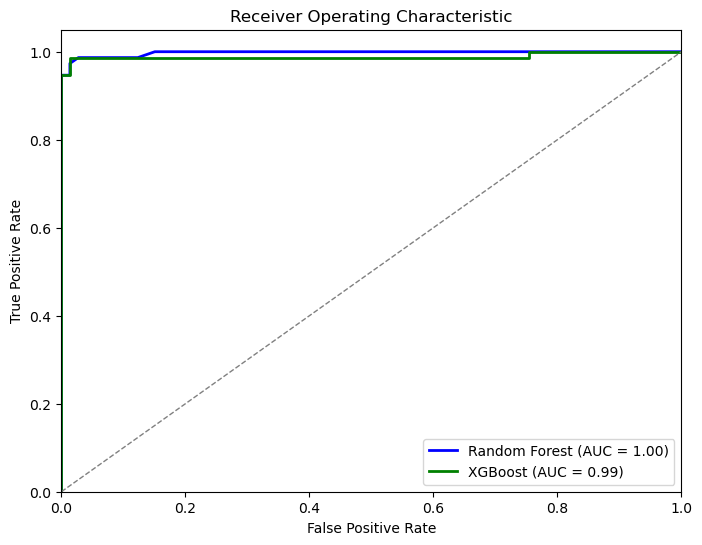

In [296]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# 在测试集上进行预测
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 计算准确度
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

# 计算混淆矩阵
rf_cm = confusion_matrix(y_test, rf_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# 计算敏感度和特异性
rf_sensitivity = rf_cm[1, 1] / (rf_cm[1, 0] + rf_cm[1, 1])
rf_specificity = rf_cm[0, 0] / (rf_cm[0, 0] + rf_cm[0, 1])

xgb_sensitivity = xgb_cm[1, 1] / (xgb_cm[1, 0] + xgb_cm[1, 1])
xgb_specificity = xgb_cm[0, 0] / (xgb_cm[0, 0] + xgb_cm[0, 1])

print("Random Forest Sensitivity:", rf_sensitivity)
print("Random Forest Specificity:", rf_specificity)


print("XGBoost Sensitivity:", xgb_sensitivity)
print("XGBoost Specificity:", xgb_specificity)

# 计算 ROC 曲线
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_prob)

# 计算 AUC
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [299]:
!pip install shap


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
                                              0.0/453.1 kB ? eta -:--:--
     --                                       30.7/453.1 kB ? eta -:--:--
     ---                                   41.0/453.1 kB 653.6 kB/s eta 0:00:01
     -------                               92.2/453.1 kB 655.4 kB/s eta 0:00:01
     -----------                          143.4/453.1 kB 853.3 kB/s eta 0:00:01
     ------------                         153.6/453.1 kB 833.5 kB/s eta 0:00:01
     ------------                         153.6/453.1 kB 833.5 kB/s eta 0:00:01
     ----------------                     204.8/453.1 kB 734.2 kB/s eta 0:00:01
     ------------------                   235.5/453.1 kB 686.8 kB/s eta 0:00:01
     --------------------                 256.0/453.1 kB 714.4 kB/s eta 0:00:01
     ----------------------               286.7/453.1 kB 737.3 kB/s eta 0:00:01
     -------------------------            317.4/453.1 kB 703.0 kB/s eta 

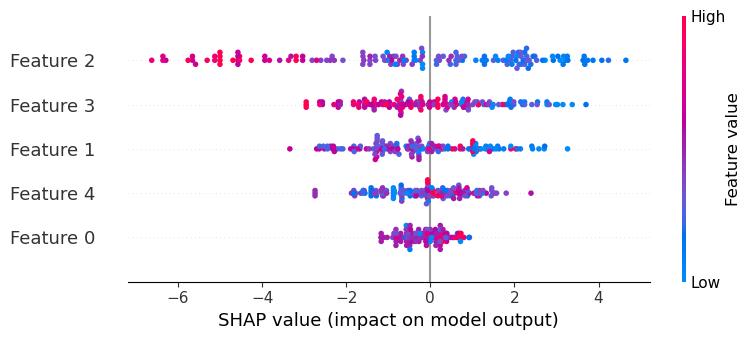

In [300]:
import shap

# 创建 SHAP 解释器对象
explainer = shap.Explainer(xgb_model, X_train)

# 获取 SHAP 值
shap_values = explainer.shap_values(X_test)

# 可视化 SHAP 值
shap.summary_plot(shap_values, X_test)

